In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [5]:
pelvis = pd.read_csv('David-30-pokus03/Xsens_DOT_2_D422CD006474_20250409_104535.csv', skiprows= 7,  sep=',')
right = pd.read_csv('David-30-pokus03/Xsens_DOT_4_D422CD006380_20250409_104535.csv', skiprows= 7,  sep=',')
left = pd.read_csv('David-30-pokus03/Xsens_DOT_3_D422CD006379_20250409_104535.csv', skiprows= 7,  sep=',')

In [7]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()


# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [12]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,0.430436,5941.785500
std,6.302065,3437.707639
min,-91.239769,0.000000
25%,0.767667,2970.892750
50%,0.868467,5941.785500
75%,0.959483,8912.678250
max,55.860016,11883.571000


In [13]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,-0.874159,5941.785500
std,7.105587,3437.707639
min,-108.116074,0.000000
25%,-0.413203,2970.892750
50%,-0.224770,5941.785500
75%,-0.114896,8912.678250
max,81.417686,11883.571000


In [14]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,0.493880,5941.785500
std,2.222581,3437.707639
min,-17.711430,0.000000
25%,0.022424,2970.892750
50%,0.530346,5941.785500
75%,0.595253,8912.678250
max,24.352053,11883.571000


<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

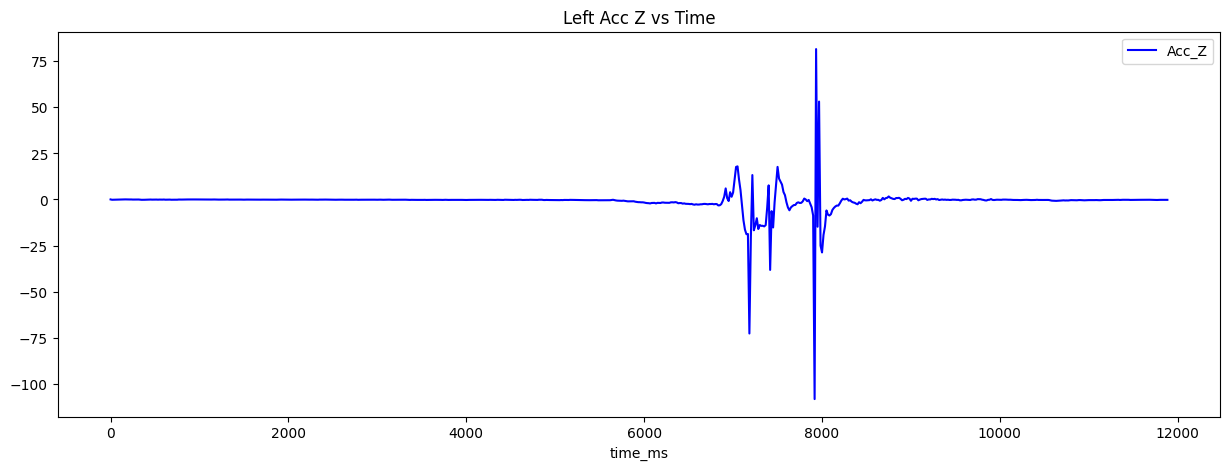

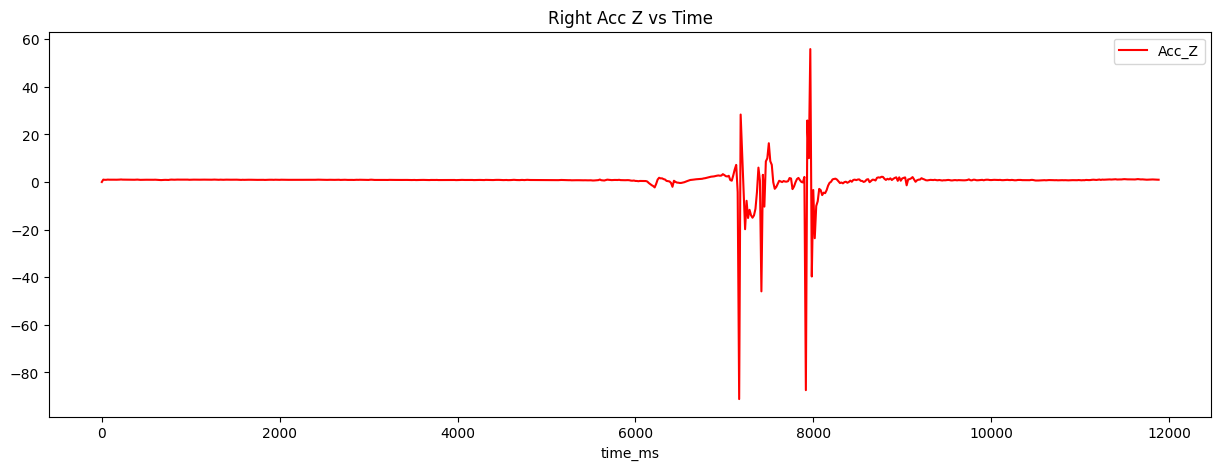

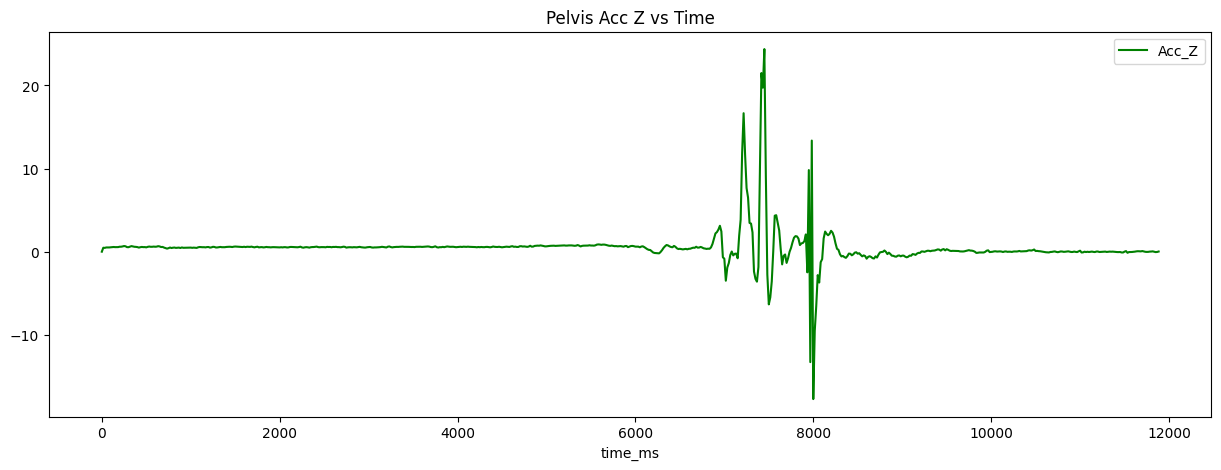

In [15]:
# visualize the data and find the connection between the accelerometer  and times 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')